In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
TEST = 'tes'
import operator

def test(a,b,cmp,cname=None):
    if cname is None: cname=cmp.__name__
    assert cmp(a,b),f"{cname}:\n{a}\n{b}"

def test_eq(a,b): test(a,b,operator.eq,'==')

In [3]:
#test_eq(TEST,'test')

In [4]:
from pathlib import Path
from IPython.core.debugger import set_trace
from fastai import datasets
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor
MNIST_URL='http://deeplearning.net/data/mnist/mnist.pkl'

In [5]:
path = datasets.download_data(MNIST_URL, ext='.gz'); path

WindowsPath('C:/Users/bitte/.fastai/data/mnist.pkl.gz')

In [6]:
# https://docs.python.org/3/library/pickle.html#pickle.load
with gzip.open(path, 'rb') as file:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(file, encoding='latin-1')

In [7]:
# map?? # https://www.geeksforgeeks.org/python-map-function/
# numbers.forEach(number => addition(number))
def addition(n): 
    return n + 5
numbers = (1, 2, 3, 4) 
result = map(addition, numbers) 
print(list(result))

[6, 7, 8, 9]


In [8]:
x_train,y_train,x_valid,y_valid = map(tensor, (x_train,y_train,x_valid,y_valid))
n,c = x_train.shape
x_train, x_train.shape, y_train, y_train.shape, y_train.min(), y_train.max()

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 torch.Size([50000, 784]),
 tensor([5, 0, 4,  ..., 8, 4, 8]),
 torch.Size([50000]),
 tensor(0),
 tensor(9))

In [9]:
n, y_train.shape[0],n==y_train.shape[0], y_train.min(), y_train.max()

(50000, 50000, True, tensor(0), tensor(9))

In [10]:
mpl.rcParams['image.cmap'] = 'gray' # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

In [11]:
img = x_train[0]

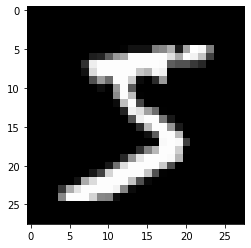

In [12]:
plt.imshow(img.view((28,28)))

In [13]:
weights = torch.randn(784,10)
bias = torch.zeros(10)

In [14]:
def matmul(a,b):
    ar,ac = a.shape
    br,bc = b.shape
    assert ac == br
#     print(ar)
#     print(ac)
#     print(br)
#     print(bc)
    c = torch.zeros(ar,bc)
    for i in range(ar):
        for j in range(ac):
            for k in range(bc):
#                 print(a[i,j])
#                 print(b[j,k])
#                 print(a[i,j] * b[j,k])
                c[i,k] += a[i,j] * b[j,k] # forgot the + in +=, was getting only [[12]]
    return c

In [15]:
ccc,ddd = tensor([[5,3]]), tensor([[2],[4]])
ccc,ddd
# matmul(tensor([5]),tensor([2]))
ccc.shape,ddd.shape

(torch.Size([1, 2]), torch.Size([2, 1]))

In [16]:
matmul(ccc,ddd)

tensor([[22.]])

In [17]:
m1 = x_valid[:5]
m2 = weights

In [18]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [19]:
%time t1=matmul(m1,m2)
t1.shape

Wall time: 852 ms


torch.Size([5, 10])

In [20]:
#Element-wise operations
a = tensor([10., 6, -4])
b = tensor([2., 8 ,7])
print(a,b)
print(a+b)
print((a<b).float().mean()) # [f t t] -> [0 1 1] -> 0.6667

tensor([10.,  6., -4.]) tensor([2., 8., 7.])
tensor([12., 14.,  3.])
tensor(0.6667)


In [21]:
m=tensor([[1., 2., 3.],[4.,5.,6.],[7.,8.,9.]]); m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [23]:
ri,cj=m.shape;ri,cj

(3, 3)

In [24]:
def sqrt_long(n):
    sum=0
    for i in range(r):
        for j in range(c):
            sum += n[i,j]**2
    return math.sqrt(sum)

In [25]:
sqrt_long(m)

16.881943016134134

In [26]:
def frobeniusNorm(n): return (n*n).sum().float().sqrt() # short version of sqrt_long, use float() if n[] vales are integers

In [27]:
frobeniusNorm(m)

tensor(16.8819)

In [28]:
def matmul(a,b):
    ar,ac = a.shape
    br,bc = b.shape
    assert ac == br
#     print(ar,ac)
#     print(br,bc)
#     print(ar,bc)
    c = torch.zeros(ar,bc)
    for i in range(ar):
        for k in range(bc):
#             print(a[i])
#             print(b[:,k])
#             print(a[i] * b[:,k])
            c[i] = (a[i] * b[:,k]).sum()
    return c

In [29]:
matmul(ccc,ddd)

tensor([[22.]])

In [30]:
%timeit -n 10 _=matmul(m1, m2)

1.13 ms ± 36 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [31]:
# Broadcasting
a

tensor([10.,  6., -4.])

In [32]:
# a > 0 # tensor([ True,  True, False])
# (a > 0).float() # tensor([1., 1., 0.])
# (a > 0).float().mean() # tensor(0.6667)
# a > tensor([0., 0., 0.]) # bbroadcasts 0 to same shape as a: a > tensor([0., 0., 0.])

In [33]:
print(a + 1)
print(m)
print(2*m)

tensor([11.,  7., -3.])
tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])
tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.],
        [14., 16., 18.]])


In [34]:
c = tensor([10., 20., 30.])
print(c)
print(m)

tensor([10., 20., 30.])
tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])


In [35]:
m.shape, c.shape

(torch.Size([3, 3]), torch.Size([3]))

In [36]:
print(m+c)
print(c+m)

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])
tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])


In [37]:
# print(c)
# print(type(c)) # prev defined c in r,c=m.shape, c was an int instead of tensor
t = c.expand_as(m)
print(t)
print(m+t)

tensor([[10., 20., 30.],
        [10., 20., 30.],
        [10., 20., 30.]])
tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])


In [38]:
print(t.storage())
print(t.storage().is_sparse)
print(t.storage().size())

 10.0
 20.0
 30.0
[torch.FloatStorage of size 3]
False
3


In [39]:
t.stride(), t.shape

((0, 1), torch.Size([3, 3]))

In [40]:
# None and unsqueeze
print(c)
print(c.unsqueeze(-1))
print(c.unsqueeze(0))
print(c.unsqueeze(1)) # -1 gives same as 1
# print(c.unsqueeze(2)) # IndexError: Dimension out of range (expected to be in range of [-2, 1], but got 2)
print(c.unsqueeze(-2)) # -2 gives same as 0
print(c.unsqueeze(0) == c.unsqueeze(-2)) # I expected just a single true
print(c.unsqueeze(1) == c.unsqueeze(-1)) # instead of true, true, true

tensor([10., 20., 30.])
tensor([[10.],
        [20.],
        [30.]])
tensor([[10., 20., 30.]])
tensor([[10.],
        [20.],
        [30.]])
tensor([[10., 20., 30.]])
tensor([[True, True, True]])
tensor([[True],
        [True],
        [True]])


In [41]:
print(c.shape)
print(c.unsqueeze(0).shape)
print(c.unsqueeze(-2).shape)
print(c[None].shape)
print(c.unsqueeze(1).shape)
print(c.unsqueeze(-1).shape)
print(c[:,None].shape)

torch.Size([3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 1])


In [42]:
# Trailing : can be omitted, and ... is shorthand for 'all preceeding dimensions'
print(c[None].shape)
print(c[None,:].shape)
print(c[:,None].shape)
print(c[...,None].shape)

torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([3, 1])
torch.Size([3, 1])


In [43]:
print(c[None].expand_as(m)) # -->
print(c[:,None].expand_as(m)) # vvv

tensor([[10., 20., 30.],
        [10., 20., 30.],
        [10., 20., 30.]])
tensor([[10., 10., 10.],
        [20., 20., 20.],
        [30., 30., 30.]])


In [103]:
def matmulMe(a,b): #I had this here initially, ~4x slower than Jeremy
    ar,ac = a.shape
    br,bc = b.shape
    assert ac == br
#     print(ar,ac)
#     print(br,bc)
#     print(ar,bc)
    c = torch.zeros(ar,bc)
    for i in range(ar):
        for k in range(bc):
#             print(a[i])
#             print(a[i][None])
#             print(b[:,k])
#             print(b[k])
#             print(a[i] * b[:,k])
            c[i] = (a[i] * b[:,k]).sum() # two for loops
    return c

In [100]:
# %timeit -n 10 _=matmulMe(ccc,ddd)
# matmulMe(ccc,ddd)
%timeit -n 10 _=matmulMe(m1,m2)
matmulMe(m1,m2)

1.1 ms ± 20.6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


tensor([[ 3.0766,  3.0766,  3.0766,  3.0766,  3.0766,  3.0766,  3.0766,  3.0766,
          3.0766,  3.0766],
        [ 3.8681,  3.8681,  3.8681,  3.8681,  3.8681,  3.8681,  3.8681,  3.8681,
          3.8681,  3.8681],
        [ 8.5170,  8.5170,  8.5170,  8.5170,  8.5170,  8.5170,  8.5170,  8.5170,
          8.5170,  8.5170],
        [ 0.7635,  0.7635,  0.7635,  0.7635,  0.7635,  0.7635,  0.7635,  0.7635,
          0.7635,  0.7635],
        [-3.8339, -3.8339, -3.8339, -3.8339, -3.8339, -3.8339, -3.8339, -3.8339,
         -3.8339, -3.8339]])

In [101]:
def matmul(a,b): #above matmulMe with line c[i] replaced
    ar,ac = a.shape
    br,bc = b.shape
    assert ac == br
    c = torch.zeros(ar,bc)
    for i in range(ar):
#         for k in range(bc): # only 1 for loop
            c[i] = (a[i].unsqueeze(-1) * b).sum(dim=0)
    return c

In [102]:
# %timeit -n 10 _=matmul(ccc,ddd)
# matmul(ccc,ddd)
%timeit -n 10 _=matmul(m1,m2)
matmul(m1,m2)

270 µs ± 15.8 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


tensor([[  0.5861,   1.5217,  -1.4350, -16.1589,  -4.0420,   4.2698,  -8.1926,
          -4.3305,  17.7720,   3.0766],
        [  1.4475,   7.4871,  12.4014, -14.9780,   0.5130,   4.0071,   1.6018,
          -7.7049,  20.1072,   3.8681],
        [  5.9346,   8.7759,  12.9948,   9.2858,   5.8667,  10.6228,  -3.6368,
           2.2924,   2.1422,   8.5170],
        [ -7.8197,   5.2653,  11.7315,  -9.9631,  12.9853,  13.7505,  -7.4121,
          -3.4885,  -6.4984,   0.7635],
        [  0.6003,  -3.5564,  10.1518,   4.2983,  -2.1999,   7.7840, -11.1944,
         -15.3879,   0.0524,  -3.8339]])

In [127]:
def matmul(a,b,doPrint=False): #jeremy's copied from notebook
    ar,ac = a.shape
    br,bc = b.shape
    assert ac==br
    c = torch.zeros(ar, bc)
    for i in range(ar):
        if(doPrint):
            print('----------')
            print(a[i])
            print(a[i].unsqueeze(-1)) # a[i][:,None]
            print(b)
            print(a[i].unsqueeze(-1) * b)
#       c[i,j] = (a[i,:]          * b[:,j]).sum() # previous
        c[i]   = (a[i].unsqueeze(-1) * b).sum(dim=0)
#     print(c)
    return c

In [134]:
# %timeit -n 10 _=matmul(ccc,ddd)
# ----------
# tensor([5, 3])
# tensor([[5],
#         [3]])
# tensor([[2],
#         [4]])
# tensor([[10],
#         [12]])
matmul(ccc,ddd,True)            # tensor([[22.]])
# matmul(ccc,ddd,True).sum()      # tensor(22.)
# matmul(ccc,ddd,True).sum(dim=0) # tensor([22.])
# matmul(ccc,ddd,True).sum(dim=1)   # tensor([22.])
# %timeit -n 10 _=matmul(m1,m2)
# matmul(m1,m2)

----------
tensor([5, 3])
tensor([[5],
        [3]])
tensor([[2],
        [4]])
tensor([[10],
        [12]])


tensor([[22.]])

In [ ]:
c[i,j] += a[i,k]*b[k,j]  # orig
a[i,k]*b[k,j] += c[i,j]  # reverse so form is a@b=c
a[i,k]*b[k,j] -> c[i,j]  # change = to ->
[i,k]*[k,j] -> [i,j],a,b # remove a,b from left side & change to params
i,k*k,j -> i,j,a,b       # remove [] of each matrix
ik*kj -> ij,a,b          # remove , from each matrix
ik,kj -> ij,a,b          # change * to , to separate input matrix params
'ik,kj->ij',a,b          # put 'eqn' inside single quotes

einsum('ik,kj->ij',a,b)  # einsum notation

In [ ]:
c[i,j] += a[i,k]*b[k,j]
'ik,kj->ij',a,b

In [140]:
def matmul(a,b): return torch.einsum('ik,kj->ij',a,b) # why do we have to define the string and parameters?
# why not just einsum(a,b)?

In [142]:
matmul(ccc,ddd)

tensor([[22]])

In [143]:
%timeit -n 10 _=matmul(m1, m2)

41 µs ± 15.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [145]:
# We can use pytorch's function or operator directly for matrix multiplication.
%timeit -n 10 t2 = m1.matmul(m2)

7.67 µs ± 5.47 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [146]:
%timeit -n 10 t2 = m1@m2

7.52 µs ± 5.31 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
